In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file_name):
    current_dir = os.getcwd()
    os.chdir(current_dir)
    data = pd.read_csv(file_name)
    # Drop rows with NaN values
    data.fillna('0')
    return data

def perform_iv_first_stage(data, instruments, columnTitle):
    # Independent instrument variables
    X = data[instruments]
    y = data['ln_export_area']
    X = sm.add_constant(X) # Adding a constant term

    first_stage = sm.OLS(y, X).fit()
    data[columnTitle] = first_stage.predict(X) # Adding predicted values
    return first_stage, data

# Instrumental Variable Regression - Second Stage
def perform_iv_second_stage(data, columnTitle, year):
    X = data[[columnTitle]]
    y = data[year]
    X = sm.add_constant(X) # Adding a constant term

    second_stage = sm.OLS(y, X).fit()
    return second_stage

def print_summary(model, data, independent_vars):
    summary = model.summary().as_text()
    summary_stats = data[independent_vars].describe().to_string()
    print(summary + '\n\nSummary Statistics:\n' + summary_stats)

In [4]:
file = '/content/mergedReplicationData2.csv'
years = ['2000', '2005', '2010', '2015', '2020']
coefs = []
df = pd.read_csv(file)

In [5]:
#2000
instruments = ['rain_min', 'indian_distance_minimum',
               'colony3', 'colony7']
columnTitle = 'predicted_ln_export_area1'
year = 'ln_maddison_pcgdp2000'
firstStageResults1, df = perform_iv_first_stage(df, instruments, columnTitle)
secondStageResults1 = perform_iv_second_stage(df, columnTitle, year)
print_summary(secondStageResults1, df, instruments)
coefs.append(secondStageResults1.params[1])

                              OLS Regression Results                             
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.019
Method:                    Least Squares   F-statistic:                   0.06959
Date:                   Mon, 29 Apr 2024   Prob (F-statistic):              0.793
Time:                           04:36:11   Log-Likelihood:                -63.260
No. Observations:                     52   AIC:                             130.5
Df Residuals:                         50   BIC:                             134.4
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [6]:
#2005
instruments = ['rain_min', 'ln_coastline_area',
               'region_s', 'indian_distance_minimum']
columnTitle = 'predicted_ln_export_area2'
year = 'LNYR2005'
firstStageResults2, df = perform_iv_first_stage(df, instruments, columnTitle)
secondStageResults2 = perform_iv_second_stage(df, columnTitle, year)
print_summary(secondStageResults2, df, instruments)
coefs.append(secondStageResults2.params[1])

                            OLS Regression Results                            
Dep. Variable:               LNYR2005   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     6.043
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0175
Time:                        04:36:13   Log-Likelihood:                -75.688
No. Observations:                  52   AIC:                             155.4
Df Residuals:                      50   BIC:                             159.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [7]:
#2010
instruments = ['abs_latitude', 'saharan_distance_minimum',
               'colony0', 'colony5']
columnTitle = 'predicted_ln_export_area3'
year = 'LNYR2010'
firstStageResults3, df = perform_iv_first_stage(df, instruments, columnTitle)
secondStageResults3 = perform_iv_second_stage(df, columnTitle, year)
print_summary(secondStageResults3, df, instruments)
coefs.append(secondStageResults3.params[1])

                            OLS Regression Results                            
Dep. Variable:               LNYR2010   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     13.80
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           0.000513
Time:                        04:36:15   Log-Likelihood:                -69.405
No. Observations:                  52   AIC:                             142.8
Df Residuals:                      50   BIC:                             146.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [8]:
#2015
instruments = ['longitude', 'rain_min',
               'indian_distance_minimum', 'colony7']
columnTitle = 'predicted_ln_export_area4'
year = 'LNYR2015'
firstStageResults4, df = perform_iv_first_stage(df, instruments, columnTitle)
secondStageResults4 = perform_iv_second_stage(df, columnTitle, year)
print_summary(secondStageResults4, df, instruments)
coefs.append(secondStageResults4.params[1])

                            OLS Regression Results                            
Dep. Variable:               LNYR2015   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     3.810
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0566
Time:                        04:36:17   Log-Likelihood:                -70.097
No. Observations:                  52   AIC:                             144.2
Df Residuals:                      50   BIC:                             148.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [9]:
#2020
instruments = ['longitude', 'island_dum',
               'colony7']
columnTitle = 'predicted_ln_export_area5'
year = 'LNYR2020'
firstStageResults5, df = perform_iv_first_stage(df, instruments, columnTitle)
secondStageResults5 = perform_iv_second_stage(df, columnTitle, year)
print_summary(secondStageResults5, df, instruments)
coefs.append(secondStageResults5.params[1])

                            OLS Regression Results                            
Dep. Variable:               LNYR2020   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     6.897
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0114
Time:                        04:36:19   Log-Likelihood:                -65.717
No. Observations:                  52   AIC:                             135.4
Df Residuals:                      50   BIC:                             139.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

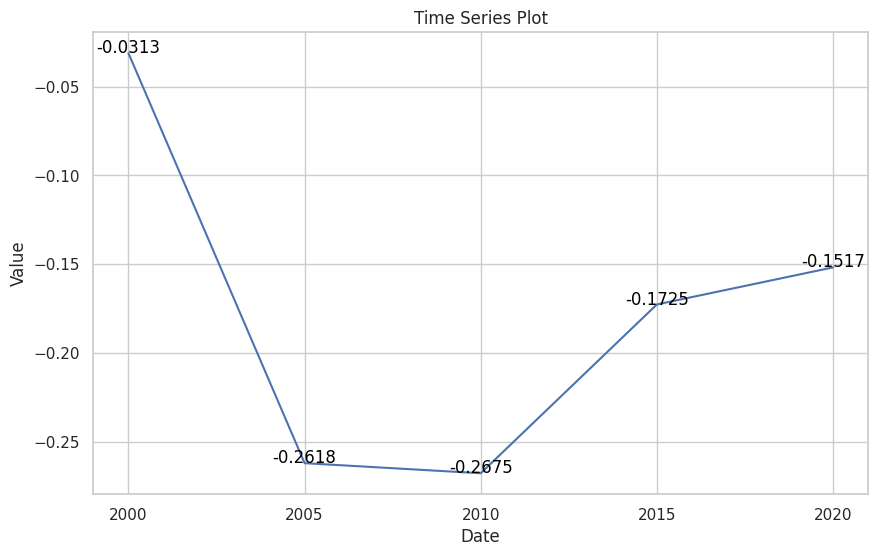

In [10]:
data = pd.DataFrame({
'Date': years,
'predicted ln_export_area coef': coefs
})
# Set the plot style
sns.set(style="whitegrid")
# Create the plot
plt.figure(figsize=(10, 6))
plot = sns.lineplot(x='Date', y='predicted ln_export_area coef', data=data)
# Customize the plot
plot.set_title('Time Series Plot')
plot.set_xlabel('Date')
plot.set_ylabel('Value')

for date, value in zip(years, coefs):
    plt.text(date, value, str(f"%.4f" %value), color='black', ha='center')
# Show the plot
plt.show()